# **Breast Cancer Detection with Logistic Regression**

## **Font family setup**

In [7]:
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

In [96]:
#Dataset Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## **Importing Dataset**

In [9]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
# Access the file in Google Drive
df = pd.read_csv("/content/drive/MyDrive/Data Science-B1/Day 9/Dataset/data.csv")

## **Basic Information**

In [75]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [76]:
df.shape

(569, 33)

In [79]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [80]:
df = df.drop('Unnamed: 32', axis=1)

## **Handle Missing Values**

In [81]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

print("Columns with Missing Values:\n", missing_values)


# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print("Missing values after filling:\n", df.isnull().sum().sum())  # Should be 0 if all missing values are handled

Columns with Missing Values:
 Series([], dtype: int64)
Missing values after filling:
 0


In [82]:
# Print the names of the features (columns)
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


## **Data Preprocessing**

In [83]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Preprocessing steps
# Replace infinity and large values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
df.dropna(inplace=True)

# Separate numerical and categorical columns, excluding the 'Default' column from categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.difference(['diagnosis'])

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Ensure all categorical values are strings
df[cat_cols] = df[cat_cols].astype(str)

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# Display the processed DataFrame
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.235730,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,-0.235727,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.235725,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## **After Processing**

In [85]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


# **Classification Starts**

In [86]:
# Define label and feature columns
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

## **Traing and Test Division**

In [87]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                   # Features and target
    test_size=0.2,          # 20% test, 80% train
    random_state=42,        # For reproducibility
)

# Confirm sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")


X_train shape: (455, 31)
X_test shape:  (114, 31)
y_train shape: (455,)
y_test shape:  (114,)


## **Train & Evaluate Logistic Regression Model**

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train logistic regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

Classification Report:
              precision    recall  f1-score   support

           B    0.97222   0.98592   0.97902        71
           M    0.97619   0.95349   0.96471        43

    accuracy                        0.97368       114
   macro avg    0.97421   0.96970   0.97186       114
weighted avg    0.97372   0.97368   0.97362       114



### **Different Evaluation Metrics**

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability for ROC AUC

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='M')
rec = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
roc_auc = roc_auc_score((y_test == 'M').astype(int), y_prob)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

Accuracy : 0.9737
Precision: 0.9762
Recall   : 0.9535
F1-score : 0.9647
ROC AUC  : 0.9974


### **Confusion Matrix**

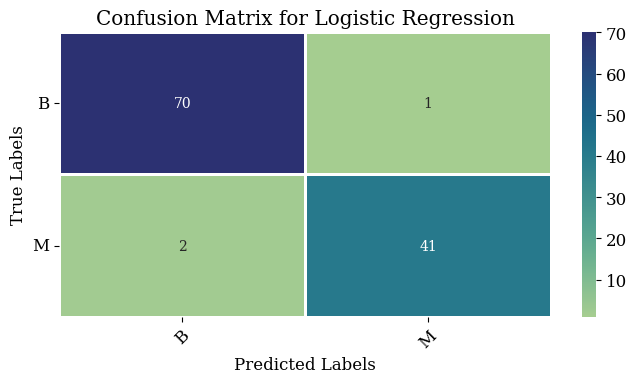

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

# Colormap
cmap = sns.color_palette("crest", as_cmap=True)

# Automatically get class labels from model
class_labels = model.classes_

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 4))

# Plot CM
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 10}, linewidths=1, linecolor='white')

ax.set_title("Confusion Matrix for Logistic Regression")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels, rotation=0)

plt.tight_layout()
plt.show()


### **ROC Curve**

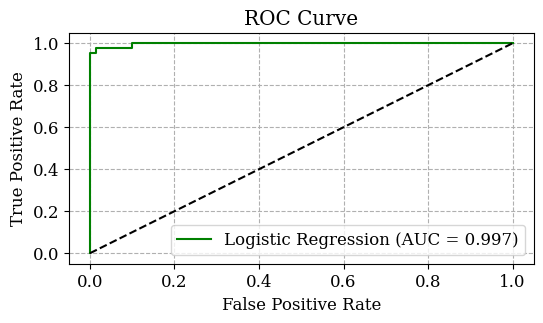

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get prediction probabilities for class 'M'
y_prob = model.predict_proba(X_test)[:, 1]
y_true = (y_test == 'M').astype(int)

# Compute ROC curve values
fpr, tpr, _ = roc_curve(y_true, y_prob)
auc = roc_auc_score(y_true, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 3))
plt.plot(fpr, tpr, color='green', label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, linestyle='--')  # dashed grid lines
plt.show()


### **Cost Function Convergence Over Iterations**

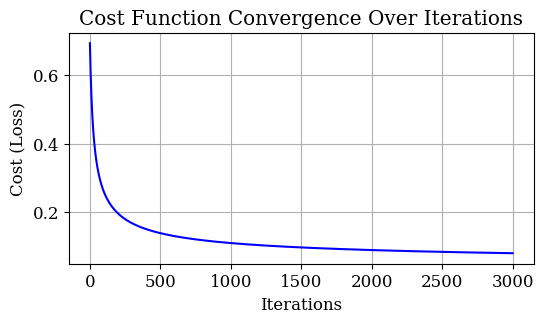

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Convert y_train to binary (0 for B, 1 for M)
y_train_bin = (y_train == 'M').astype(int).values

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 3000
costs = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent using direct X_train
for i in range(iterations):
    z = np.dot(X_train, theta)
    h = sigmoid(z)
    error = h - y_train_bin
    cost = (-1 / len(y_train_bin)) * np.sum(
        y_train_bin * np.log(h + 1e-9) + (1 - y_train_bin) * np.log(1 - h + 1e-9)
    )
    costs.append(cost)
    gradient = np.dot(X_train.T, error) / len(y_train_bin)
    theta -= alpha * gradient

# Plot cost vs. iteration
plt.figure(figsize=(6,3))
plt.plot(range(iterations), costs, color='blue')
plt.title('Cost Function Convergence Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss)')
plt.grid(True)
plt.show()


## **Explainable AI (XAI)**

### **LIME (Local Interpretable Model-Agnostic Explanations)**

In [115]:
!pip install lime

In [120]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [122]:
from lime import lime_tabular

# Initialize explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],  # or use list(model.classes_) if applicable
    mode='classification'
)

# Explain one sample (you can change index)
sample_index = 10
exp = explainer.explain_instance(
    data_row=X_test.iloc[sample_index],
    predict_fn=model.predict_proba
)

# Show explanation
exp.show_in_notebook(show_table=True)


### **SHAP (SHapley Additive exPlanations)**

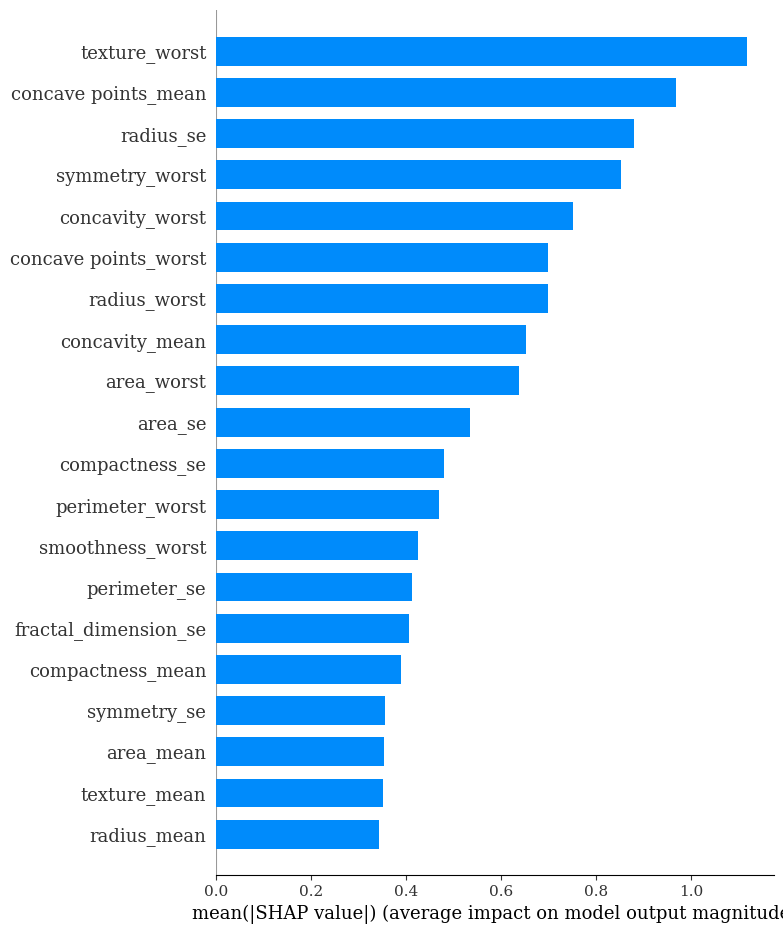

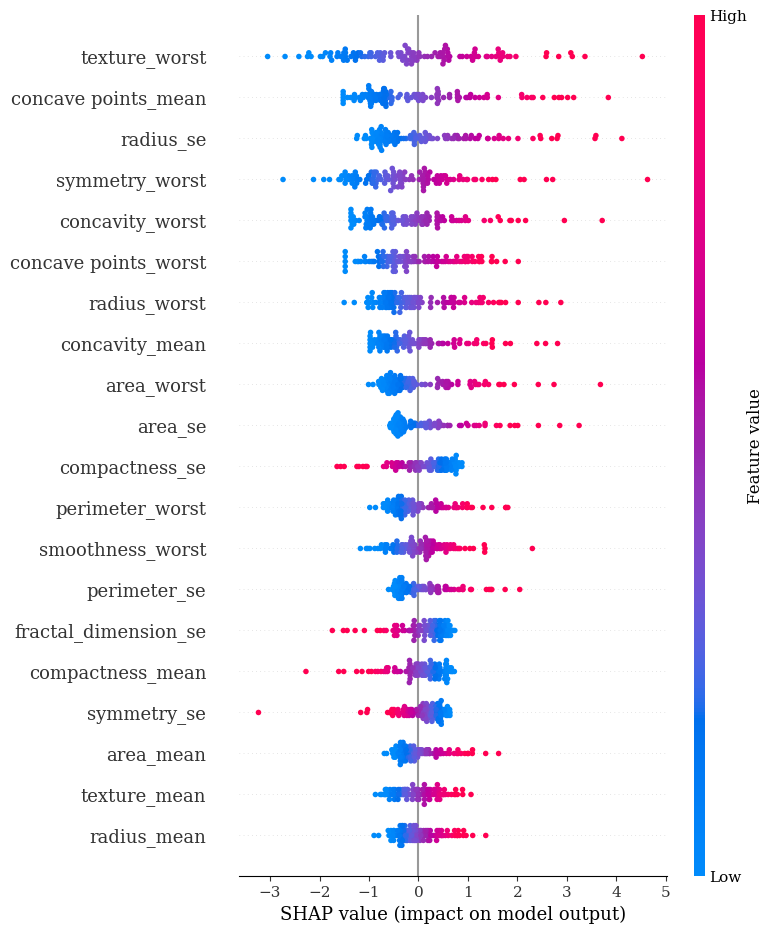

In [124]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed summary (beeswarm)
shap.summary_plot(shap_values, X_test)


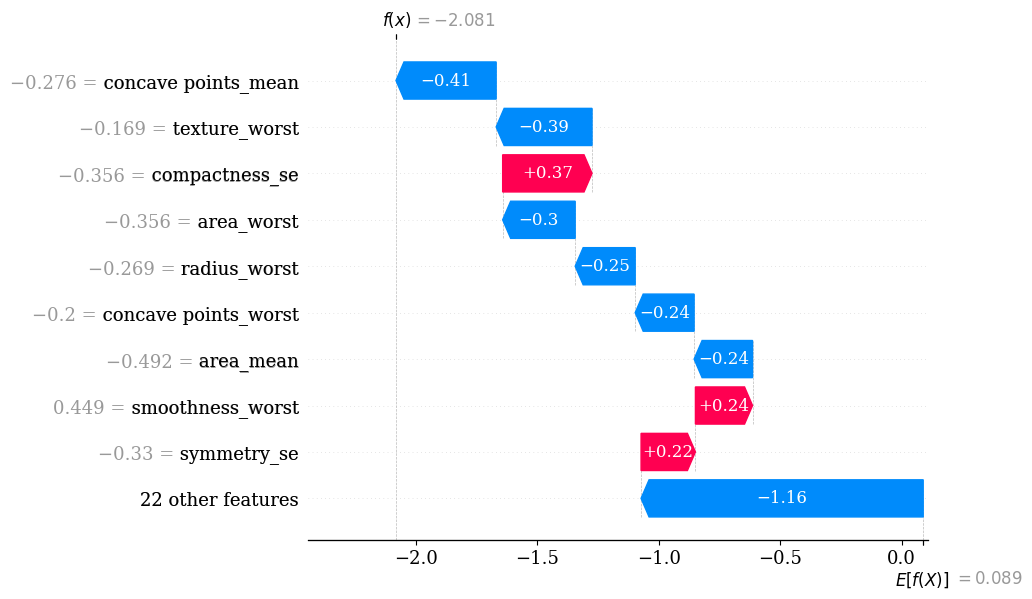

In [125]:
# Explain a single instance
shap.plots.waterfall(shap_values[0])


# **Thank you Everyone!**